In [28]:
import pandas as pd
import numpy as np
import random
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from scipy import stats


In [43]:
genotype = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/genotype.csv', sep='\t', index_col=0)
emp_pvals = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')


In [44]:
genotype

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
SNP0,1,2,1,1,2,1,1,0,0,0,...,1,1,1,2,1,2,1,1,1,0
SNP1,0,1,0,0,1,0,1,0,1,1,...,2,1,1,0,1,2,1,2,1,1
SNP2,0,2,2,1,0,0,0,1,0,1,...,2,0,1,1,2,0,1,2,0,2
SNP3,2,2,2,0,1,2,1,0,1,0,...,2,0,1,0,2,1,1,1,0,1
SNP4,2,1,1,1,2,2,1,1,1,2,...,0,2,1,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNP995,1,1,1,0,1,0,2,0,2,0,...,1,0,0,1,1,1,1,1,1,1
SNP996,0,1,1,0,0,0,0,1,0,1,...,1,2,2,1,1,0,0,2,1,1
SNP997,2,2,2,1,2,1,1,1,1,1,...,0,1,1,0,1,1,1,1,0,0
SNP998,1,1,1,2,1,2,0,0,2,1,...,1,0,2,1,0,1,1,0,2,2


In [48]:
snp0_geno = np.array(genotype.loc['SNP0'])

In [70]:
def permute_snps(snp, n, genotype):
#     snp_geno = np.array(genotype.loc['SNP0'])
    snp_geno = np.array(genotype.loc[snp])
    permute_snp = []
    for i in range(n):
        permute_snp.append(np.random.permutation(snp_geno))
    row = ['SNPermute' + str(i) for i in range(n)]
    permute_snp0_df = pd.DataFrame(permute_snp, index=row, columns=genotype.columns)
    return permute_snp0_df

In [66]:
np.array(permute_snp).shape

(1000, 500)

In [73]:
permute_snp0_df = permute_snps('SNP0', 10000, genotype)

In [76]:
permute_snp0_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/genotype_permuteSNP0.csv', sep='\t')

In [77]:
permute_snp354_df = permute_snps('SNP354', 10000, genotype)
permute_snp354_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/genotype_permuteSNP354.csv', sep='\t')

In [78]:
permute_snp1_df = permute_snps('SNP1', 10000, genotype)
permute_snp1_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/genotype_permuteSNP1.csv', sep='\t')

In [79]:
sim = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_converted', skiprows=1, usecols=1)

In [80]:
sim

array([9.76523320e-03, 7.20390237e+01, 9.51979555e+01, ...,
       6.83734651e+00, 2.24668818e+02, 5.89236174e+02])

In [81]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')

In [82]:
null_snp0

,snp,cpma,pvalue
0,SNP0,8061.680412,0.000900
1,SNP1,3.366135,0.938106
2,SNP10,2.150428,0.949005
3,SNP100,639.658003,0.298770
4,SNP101,1478.513663,0.099490
...,...,...,...
995,SNP995,372.760850,0.431457
996,SNP996,1132.518742,0.154185
997,SNP997,240.188640,0.527047
998,SNP998,1.883967,0.953005


Text(0, 0.5, 'count')

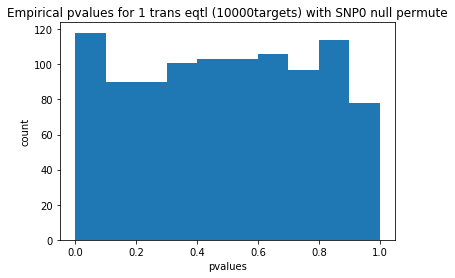

In [89]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals = np.array(null_snp0['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (10000targets) with SNP0 null permute')
plt.xlabel('pvalues')
plt.ylabel('count')

In [93]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.02568923107689236, pvalue=0.5241622013089527)

In [91]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

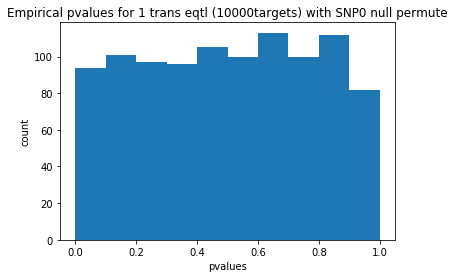

In [88]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(null_snp0['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (10000targets) with SNP0 null permute')
plt.xlabel('pvalues')
plt.ylabel('count')

In [94]:
genotype1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/genotype.csv', sep='\t', index_col=0)
emp_pvals1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')


In [95]:
genotype1

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
SNP0,2,1,0,1,2,1,0,0,1,1,...,1,1,1,0,0,1,1,1,1,1
SNP1,0,2,1,2,0,1,2,1,2,2,...,0,1,2,2,0,2,1,1,1,0
SNP2,1,1,2,2,2,0,0,2,1,0,...,1,2,1,1,1,0,1,0,1,0
SNP3,2,1,1,1,0,2,2,2,0,1,...,0,0,2,1,1,2,2,1,2,2
SNP4,0,1,1,0,1,2,1,1,2,1,...,0,1,0,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNP995,2,2,1,0,2,2,1,0,1,0,...,2,2,1,2,0,1,2,0,2,1
SNP996,2,2,0,2,2,1,1,2,2,0,...,1,2,2,2,1,1,0,2,0,2
SNP997,1,2,1,1,2,1,1,0,2,1,...,0,2,2,2,0,1,2,1,1,1
SNP998,2,0,0,1,2,0,1,1,1,1,...,1,1,1,1,1,2,0,2,1,1


In [96]:
permute_snp0_df = permute_snps('SNP0', 100000, genotype1)
permute_snp0_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/permute_snps/genotype_permuteSNP0.csv', sep='\t')

Text(0, 0.5, 'count')

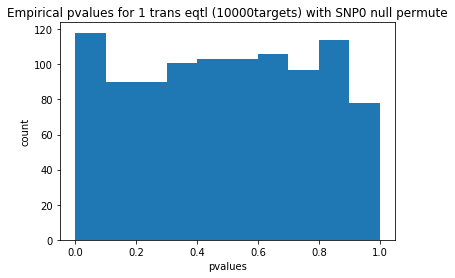

In [3]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals = np.array(null_snp0['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (10000targets) with SNP0 null permute')
plt.xlabel('pvalues')
plt.ylabel('count')

Text(0, 0.5, 'count')

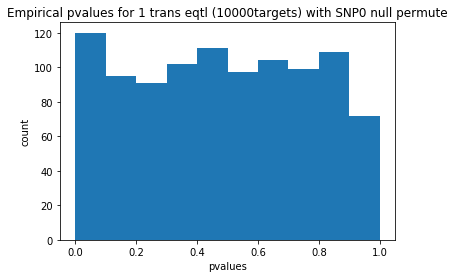

In [21]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP1/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals = np.array(null_snp0['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (10000targets) with SNP0 null permute')
plt.xlabel('pvalues')
plt.ylabel('count')

In [9]:
def QQPlot(pvals1):
    # Sort the observed p-values
    pvals1.sort()

    # Generate some random data from uniform distribution 
    unif1 = list(np.random.uniform(0, 1, size=len(pvals1))) 
    unif1.sort()

    # Make a QQ plot
    fig = plt.figure(figsize=(12, 12), dpi=150)
    ax = fig.add_subplot(111)
    ax.scatter(-1*np.log10(unif1), -1*np.log10(pvals1), s=20, color="lightcoral", label='snp_permute') 
 
    ax.set_xlim(-0.05, 3.05)
    ax.set_ylim(-0.05, 3.05)
    ax.plot([-0.05, 3.05], [-0.05, 3.05], color="black")
    lgnd = plt.legend(loc='lower right', scatterpoints=1, prop={'size': 18})
    lgnd.legendHandles[0]._sizes = [200]

#     ax.set_xlim(left=0, right=3)
#     ax.set_ylim(bottom=0, top=max(-1*np.log10([item for item in pvals if item>0])))
    ax.set_xlabel("Expected -log10(P)") 
    ax.set_ylabel("Observed -log10(P)")

 

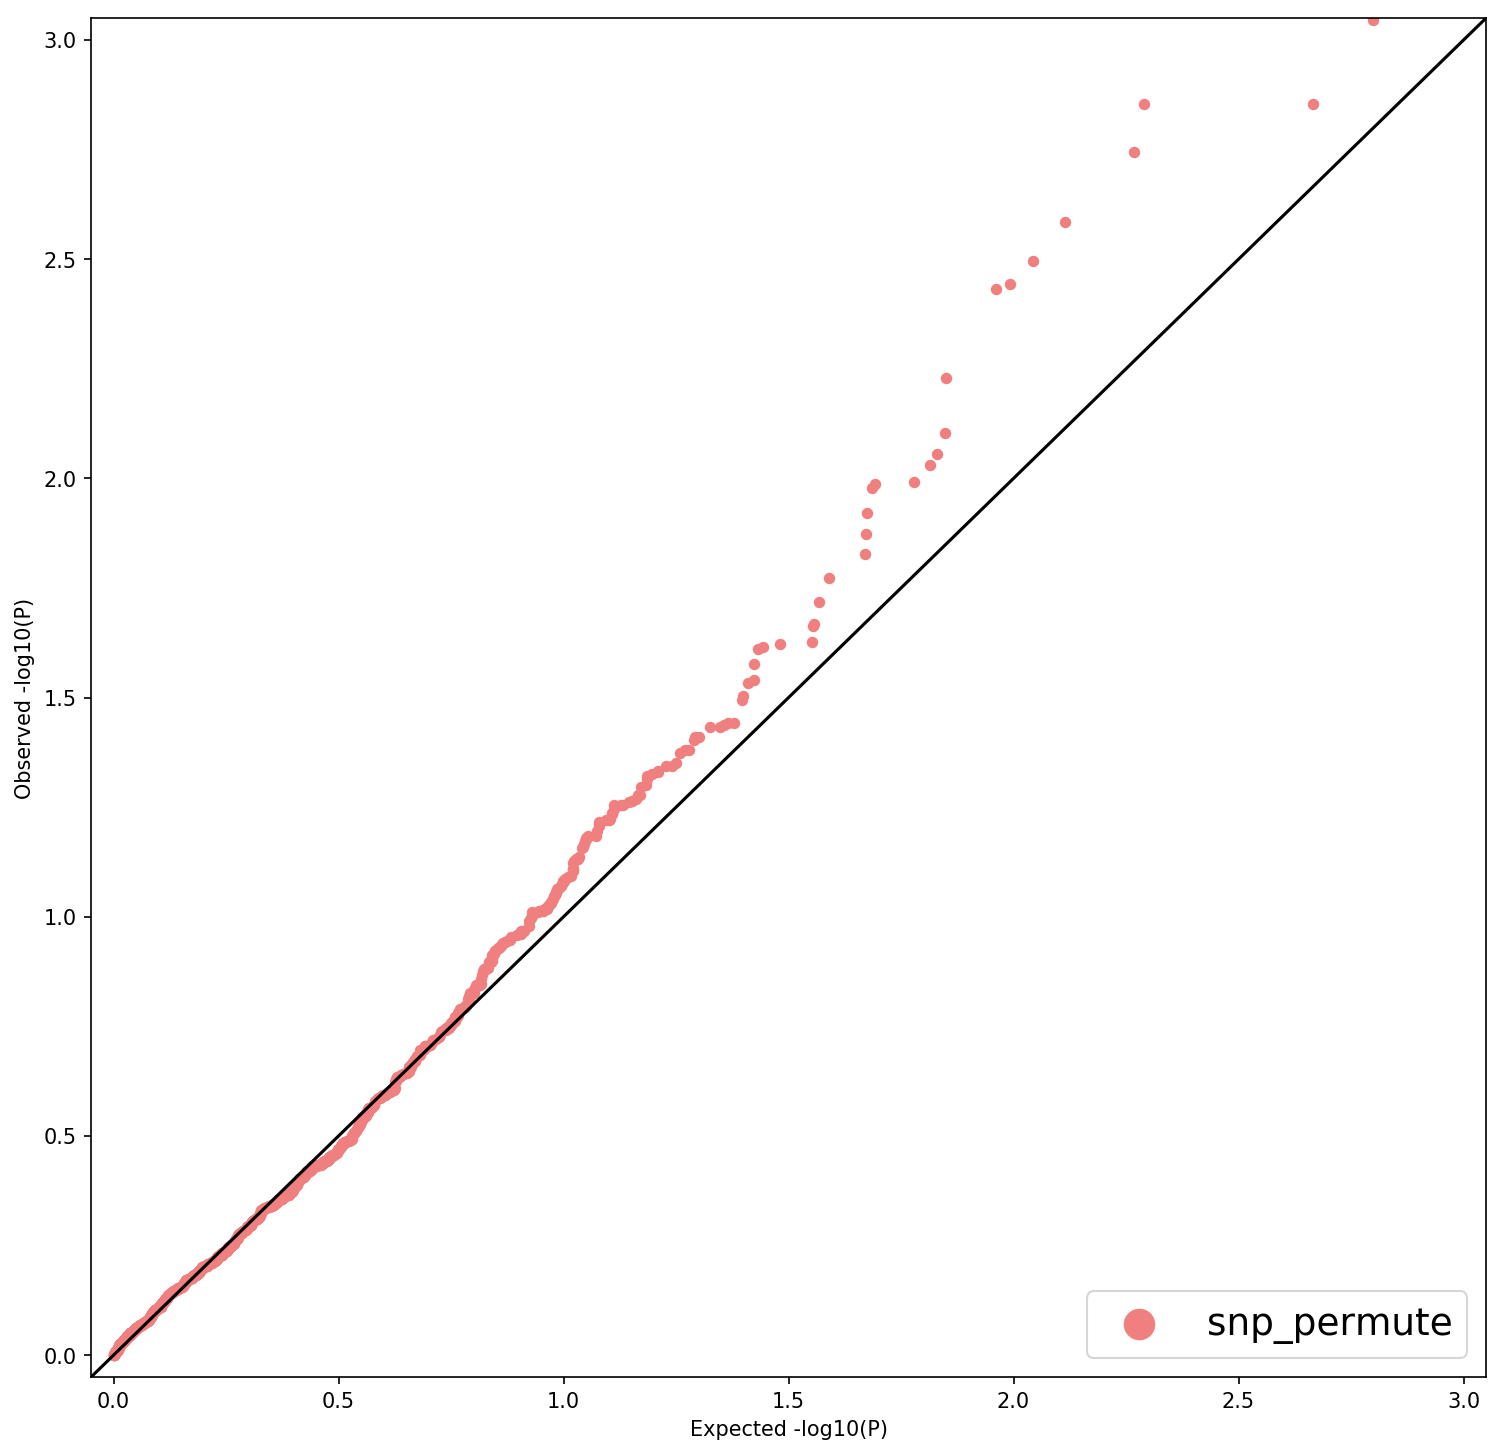

In [10]:
QQPlot(pvals)


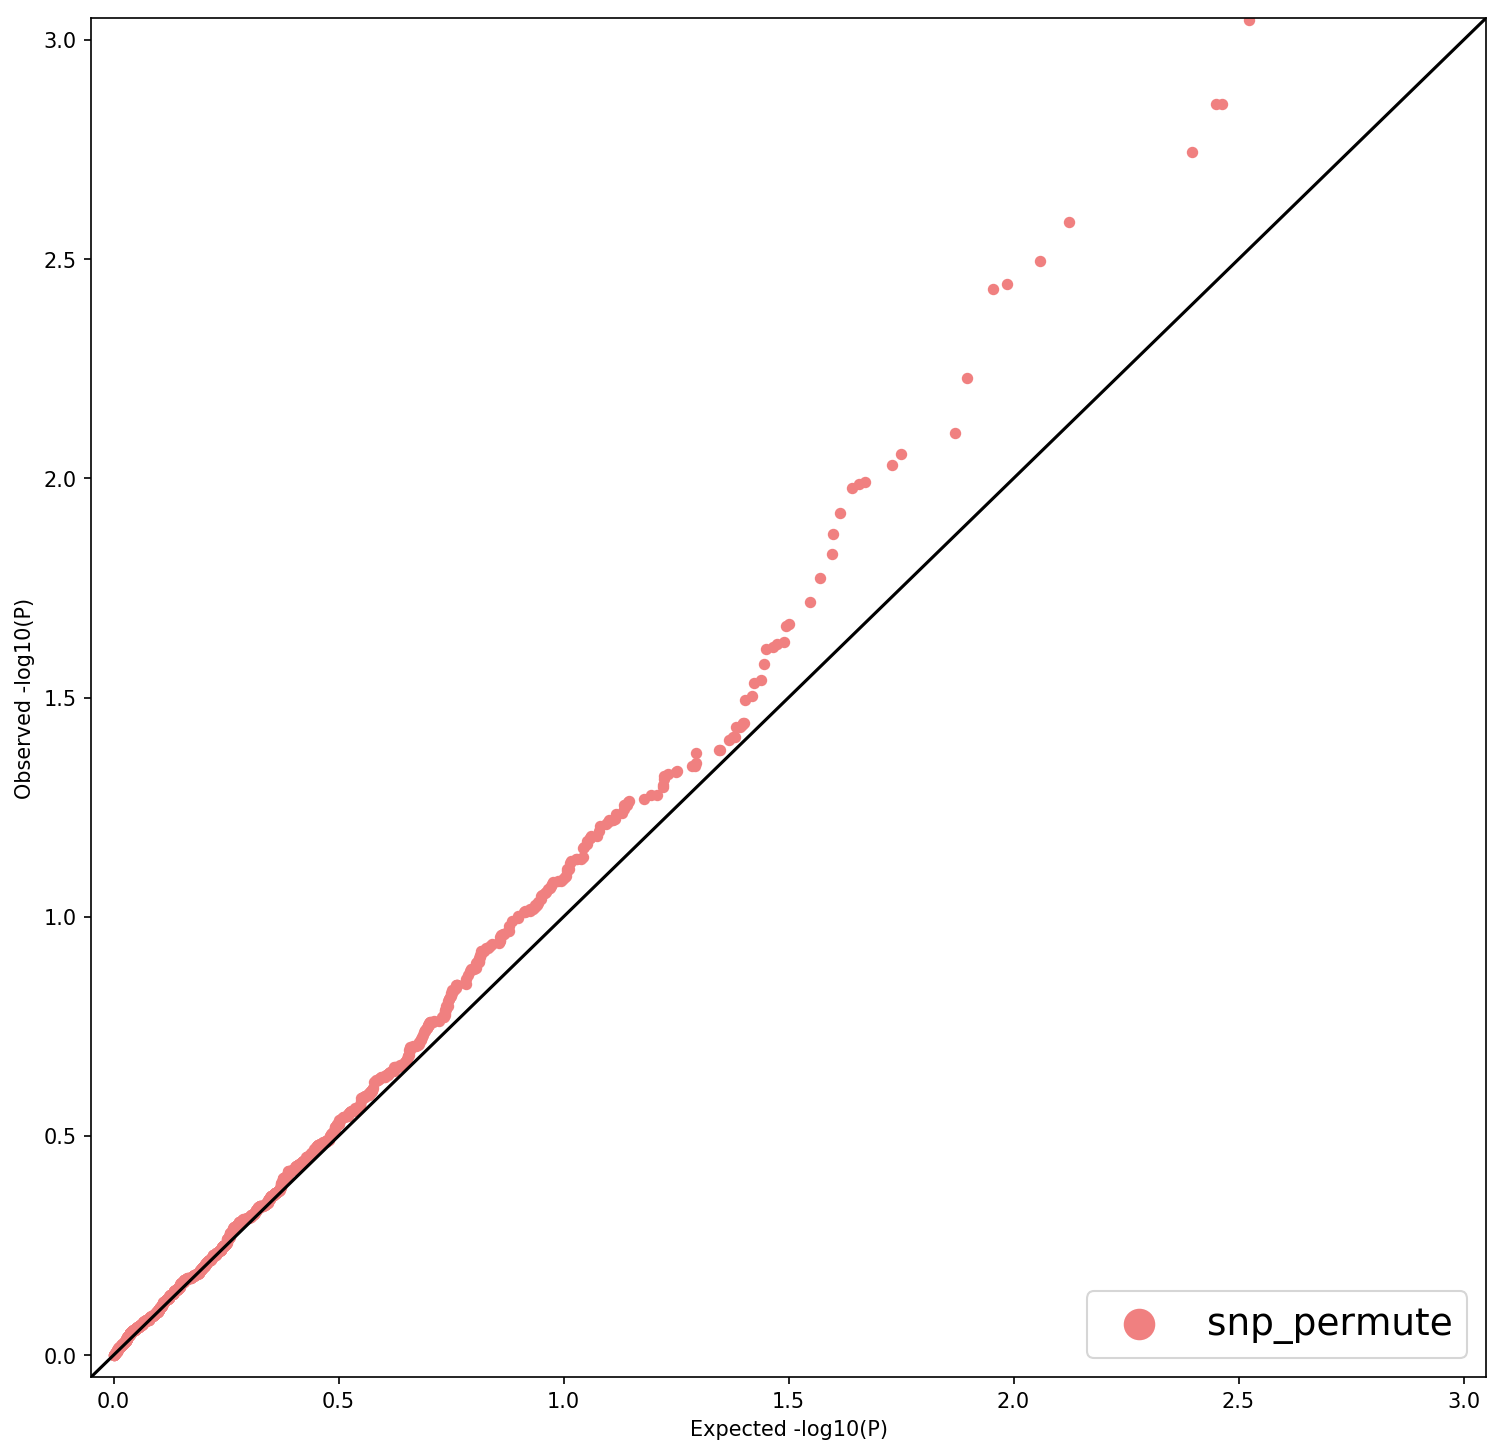

In [11]:
null_snp1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP1/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals = np.array(null_snp0['pvalue'])
QQPlot(pvals)


In [13]:
pvals = []
for i in range(0, 6):
    data = pd.read_csv(f'/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_0/Simulation_{i}/CPMAx/gene-snp-eqtl_cpma_topx_1.0_converted_chisquare', sep='\t')
    pvals.append(np.array(data['pvalue']))
pvals_gene_nocorr = np.array(pvals).flatten()

pvals = []
for i in range(0, 6):
    data = pd.read_csv(f'/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/firstTargets/numTarget_1000/Beta_0/Simulation_{i}/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
    pvals.append(np.array(data['pvalue']))
pvals_gene_corr = np.array(pvals).flatten()


In [24]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals0 = np.array(null_snp0['pvalue'])
null_snp1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP1/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals1 = np.array(null_snp1['pvalue'])


In [25]:
def QQPlot(pvals1, pvals2, pvals3, pvals4):
    # Sort the observed p-values
    pvals1.sort()
    pvals2.sort()
    pvals3.sort()
    pvals4.sort()
    # Generate some random data from uniform distribution 
    unif1 = list(np.random.uniform(0, 1, size=len(pvals1))) 
    unif1.sort()
    unif2 = list(np.random.uniform(0, 1, size=len(pvals3))) 
    unif2.sort()
    # Make a QQ plot
    fig = plt.figure(figsize=(12, 12), dpi=150)
    ax = fig.add_subplot(111)
    ax.scatter(-1*np.log10(unif1), -1*np.log10(pvals1), s=20, color="lightcoral", label='adjusted, eigendecomposition') 
    ax.scatter(-1*np.log10(unif1), -1*np.log10(pvals2), s=20, color="maroon", label='unadjusted') 
    ax.scatter(-1*np.log10(unif2), -1*np.log10(pvals3), s=20, color="skyblue", label='adjusted, permute_snps') 
    ax.scatter(-1*np.log10(unif2), -1*np.log10(pvals4), s=20, color="blue", label='adjusted, permute_snps') 

    ax.set_xlim(-0.05, 3.05)
    ax.set_ylim(-0.05, 3.05)
    ax.plot([-0.05, 3.05], [-0.05, 3.05], color="black")
    lgnd = plt.legend(loc='lower right', scatterpoints=1, prop={'size': 18})
    lgnd.legendHandles[0]._sizes = [200]
    lgnd.legendHandles[1]._sizes = [200]
    lgnd.legendHandles[2]._sizes = [200]
    lgnd.legendHandles[3]._sizes = [200]

#     ax.set_xlim(left=0, right=3)
#     ax.set_ylim(bottom=0, top=max(-1*np.log10([item for item in pvals if item>0])))
    ax.set_xlabel("Expected -log10(P)") 
    ax.set_ylabel("Observed -log10(P)")

 

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


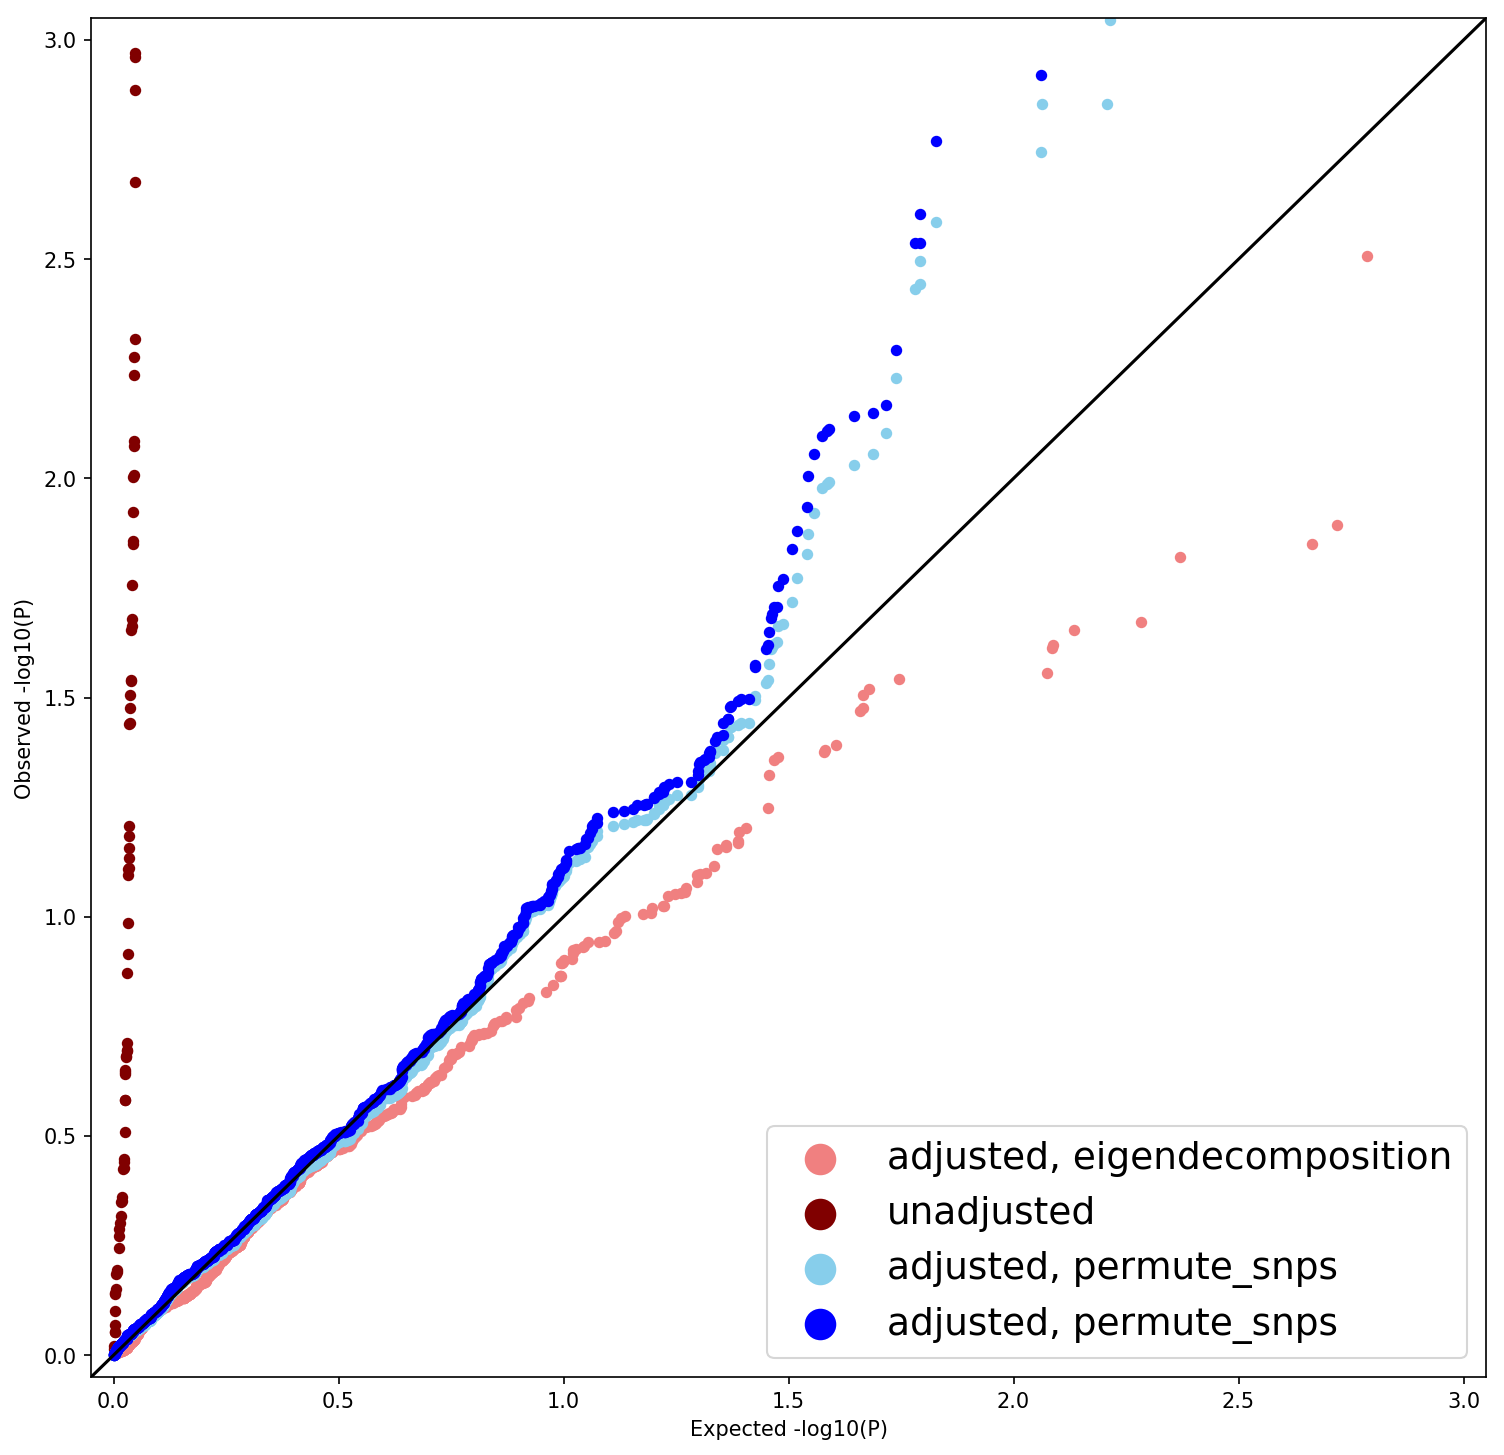

In [26]:
QQPlot(pvals_gene_corr, pvals_gene_nocorr, pvals0, pvals1)

# Eigendecomposition

In [29]:
data = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/Matrixeqtl/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')

(array([258., 296., 291., 311., 329., 286., 310., 318., 309., 292.]),
 array([4.99999000e-04, 1.00446599e-01, 2.00393199e-01, 3.00339799e-01,
        4.00286399e-01, 5.00233000e-01, 6.00179600e-01, 7.00126200e-01,
        8.00072800e-01, 9.00019400e-01, 9.99966000e-01]),
 <a list of 10 Patch objects>)

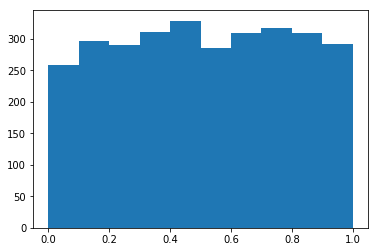

In [33]:
plt.hist(data['pvalue'])

In [35]:
data = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/Matrixeqtl/gene-snp-eqtl_sim500000_cpma.gz')

(array([4.72543e+05, 2.26650e+04, 3.39700e+03, 9.28000e+02, 3.03000e+02,
        1.00000e+02, 3.80000e+01, 1.40000e+01, 8.00000e+00, 4.00000e+00]),
 array([    0.       ,  2222.5310783,  4445.0621566,  6667.5932349,
         8890.1243132, 11112.6553915, 13335.1864698, 15557.7175481,
        17780.2486264, 20002.7797047, 22225.310783 ]),
 <a list of 10 Patch objects>)

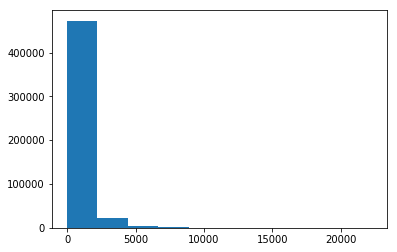

In [37]:
plt.hist(data)

In [40]:
geno = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/genotype.csv', sep='\t', index_col=0)

In [41]:
geno

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
SNP0,2,2,2,0,0,1,1,2,1,2,...,1,1,0,1,1,1,1,0,1,1
SNP1,0,2,0,1,1,0,2,0,0,1,...,0,1,1,1,2,1,1,2,1,0
SNP2,0,2,2,2,2,1,0,2,1,1,...,0,0,1,0,2,1,2,0,0,0
SNP3,1,1,1,0,1,1,1,0,1,1,...,0,0,1,2,0,1,1,1,1,2
SNP4,0,1,2,1,2,0,2,1,2,2,...,1,1,1,2,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNP2995,1,2,1,1,0,0,1,0,1,2,...,1,0,0,2,2,0,1,0,2,1
SNP2996,1,2,1,1,1,1,0,2,1,0,...,2,2,1,1,1,1,1,1,2,2
SNP2997,1,1,2,1,0,1,1,2,0,1,...,0,0,2,0,1,0,1,1,2,1
SNP2998,1,1,1,2,0,2,0,0,1,1,...,1,2,1,0,1,0,0,2,2,1


In [44]:
num_rows = len(geno.index)

In [47]:
random.randint(0,num_rows-1)

647

In [46]:
random.randint(0,1)

1

In [55]:
def permute_snps(n, genotype, output):
    num_rows = len(genotype.index)
    permute_snp = []
    f = open('myfile', 'w')
    for i in range(n):
        index = random.randint(0,num_rows-1)
        snp_geno = np.array(genotype.iloc[index])
        f.write('hi there\n')
        permute_snp.append(np.random.permutation(snp_geno))
    row = ['SNPermute' + str(i) for i in range(n)]
    permute_df = pd.DataFrame(permute_snp, index=row, columns=genotype.columns)
    return permute_df

In [56]:
permute_snps(1, geno)

2646
[1 1 2 1 2 1 1 0 2 1 1 0 2 2 0 1 0 2 2 1 0 2 0 0 1 0 0 1 1 1 1 1 1 1 0 2 0
 0 2 2 1 1 1 0 2 1 1 1 1 2 1 1 0 0 1 1 2 2 1 1 2 0 0 0 1 1 0 0 0 1 0 1 2 1
 1 1 0 1 1 1 1 2 0 1 1 2 1 0 0 1 1 0 2 0 1 0 1 2 0 2 2 1 0 1 2 1 0 2 1 1 2
 1 2 1 0 2 2 2 1 0 1 1 1 0 1 0 1 1 0 2 1 1 0 1 1 1 0 0 0 0 2 1 0 2 1 0 2 1
 1 0 2 1 1 2 1 0 1 1 2 0 0 1 1 2 1 1 2 2 2 2 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 2 0 2 2 2 1 2 0 1 0 1 0 1 2 1 0 2 2 1 1 1 2 1 0 1 0 1 1 1 1 2 1 2 1 1 1 1
 1 0 2 1 1 2 2 0 2 1 1 0 1 1 1 2 1 2 1 0 2 2 2 1 0 2 0 1 1 1 1 1 2 0 1 2 0
 1 2 1 1 1 2 0 0 2 2 0 2 0 1 2 0 0 1 2 0 0 1 2 1 1 1 1 2 1 2 2 1 2 1 1 2 1
 1 0 0 0 1 1 0 1 1 0 1 1 0 1 2 1 1 1 1 2 0 1 2 2 2 0 0 2 1 2 1 2 1 1 1 1 1
 0 1 0 1 1 0 2 2 2 1 0 1 1 1 1 1 1 2 1 0 2 1 1 2 1 1 1 0 2 2 1 2 2 2 1 2 0
 1 1 2 1 0 1 2 1 1 0 1 1 1 1 0 1 1 1 0 1 1 2 0 0 2 1 2 2 2 1 2 2 1 1 1 2 1
 1 2 1 0 0 1 2 1 1 1 2 1 0 1 1 2 1 2 0 0 0 0 1 0 1 2 2 1 1 1 0 1 2 1 1 0 2
 1 1 0 0 2 1 1 2 0 2 1 1 2 0 1 1 1 0 2 1 2 1 2 1 2 1 1 2 1 0 0 2 2 2 1 1 2
 1 0 2 1 0 1 2 2 2 1

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
SNPermute0,0,0,1,1,2,1,0,2,1,2,...,0,0,0,0,0,2,1,2,0,2


In [57]:
geno.iloc[2646]

Sample0      1
Sample1      1
Sample2      2
Sample3      1
Sample4      2
            ..
Sample495    1
Sample496    2
Sample497    1
Sample498    0
Sample499    1
Name: SNP2646, Length: 500, dtype: int64

# permute snps

In [58]:
values = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/snp_permute/Simulation_0/CPMA/cpma_null_permute', sep='\t')

In [59]:
values

,SNP,CPMA
0,SNPermute252722,1.935503e+04
1,SNPermute102550,1.921833e+04
2,SNPermute171686,1.848464e+04
3,SNPermute434290,1.449163e+04
4,SNPermute40662,1.369297e+04
...,...,...
499995,SNPermute277599,1.564287e-08
499996,SNPermute474918,1.137967e-08
499997,SNPermute131075,9.653249e-09
499998,SNPermute275812,5.300133e-10


(array([4.19041e+05, 6.81390e+04, 1.12990e+04, 1.30900e+03, 1.63000e+02,
        2.60000e+01, 1.60000e+01, 4.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.12742997e-10, 1.93550271e+03, 3.87100542e+03, 5.80650813e+03,
        7.74201084e+03, 9.67751355e+03, 1.16130163e+04, 1.35485190e+04,
        1.54840217e+04, 1.74195244e+04, 1.93550271e+04]),
 <a list of 10 Patch objects>)

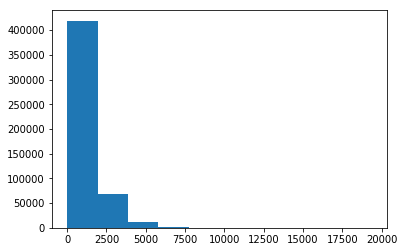

In [60]:
plt.hist(values['CPMA'])

# Eigendecomp vs snp permute

In [68]:
def QQPlot(pvals1, pvals2, pvals3):
    # Sort the observed p-values
    pvals1.sort()
    pvals2.sort()
    pvals3.sort()
#     pvals4.sort()
    # Generate some random data from uniform distribution 
    unif1 = list(np.random.uniform(0, 1, size=len(pvals1))) 
    unif1.sort()
#     unif2 = list(np.random.uniform(0, 1, size=len(pvals3))) 
#     unif2.sort()
    # Make a QQ plot
    fig = plt.figure(figsize=(12, 12), dpi=150)
    ax = fig.add_subplot(111)
    ax.scatter(-1*np.log10(unif1), -1*np.log10(pvals1), s=20, color="maroon", label='unadjusted, chi_dist') 
    ax.scatter(-1*np.log10(unif1), -1*np.log10(pvals2), s=20, color="green", label='adjusted, eigendecomposition') 
    ax.scatter(-1*np.log10(unif1), -1*np.log10(pvals3), s=20, color="blue", label='adjusted, permute_snps') 
#     ax.scatter(-1*np.log10(unif2), -1*np.log10(pvals4), s=20, color="blue", label='adjusted, permute_snps') 

    ax.set_xlim(-0.05, 3.05)
    ax.set_ylim(-0.05, 3.05)
    ax.plot([-0.05, 3.05], [-0.05, 3.05], color="black")
    lgnd = plt.legend(loc='lower right', scatterpoints=1, prop={'size': 18})
    lgnd.legendHandles[0]._sizes = [200]
    lgnd.legendHandles[1]._sizes = [200]
    lgnd.legendHandles[2]._sizes = [200]
#     lgnd.legendHandles[3]._sizes = [200]

#     ax.set_xlim(left=0, right=3)
#     ax.set_ylim(bottom=0, top=max(-1*np.log10([item for item in pvals if item>0])))
    ax.set_xlabel("Expected -log10(P)") 
    ax.set_ylabel("Observed -log10(P)")

 

In [63]:
chi_dist = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_cpma_topx_1.0_converted_chidist', sep='\t')
eigendecomp = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_cpma_topx_1.0_converted_eigendecomp', sep='\t')
snp_permute = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/CPMA/gene-snp-eqtl_cpma_topx_1.0_converted_snpermute', sep='\t')



In [64]:
chi_dist

,snp,cpma,pvalue
0,SNP0,12.067401,5.131119e-04
1,SNP1,1128.192492,0.000000e+00
2,SNP10,2067.854370,0.000000e+00
3,SNP100,1205.503078,0.000000e+00
4,SNP1000,366.085362,0.000000e+00
...,...,...,...
2995,SNP995,579.468159,0.000000e+00
2996,SNP996,29.608297,5.287812e-08
2997,SNP997,340.544656,0.000000e+00
2998,SNP998,287.819445,0.000000e+00


/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


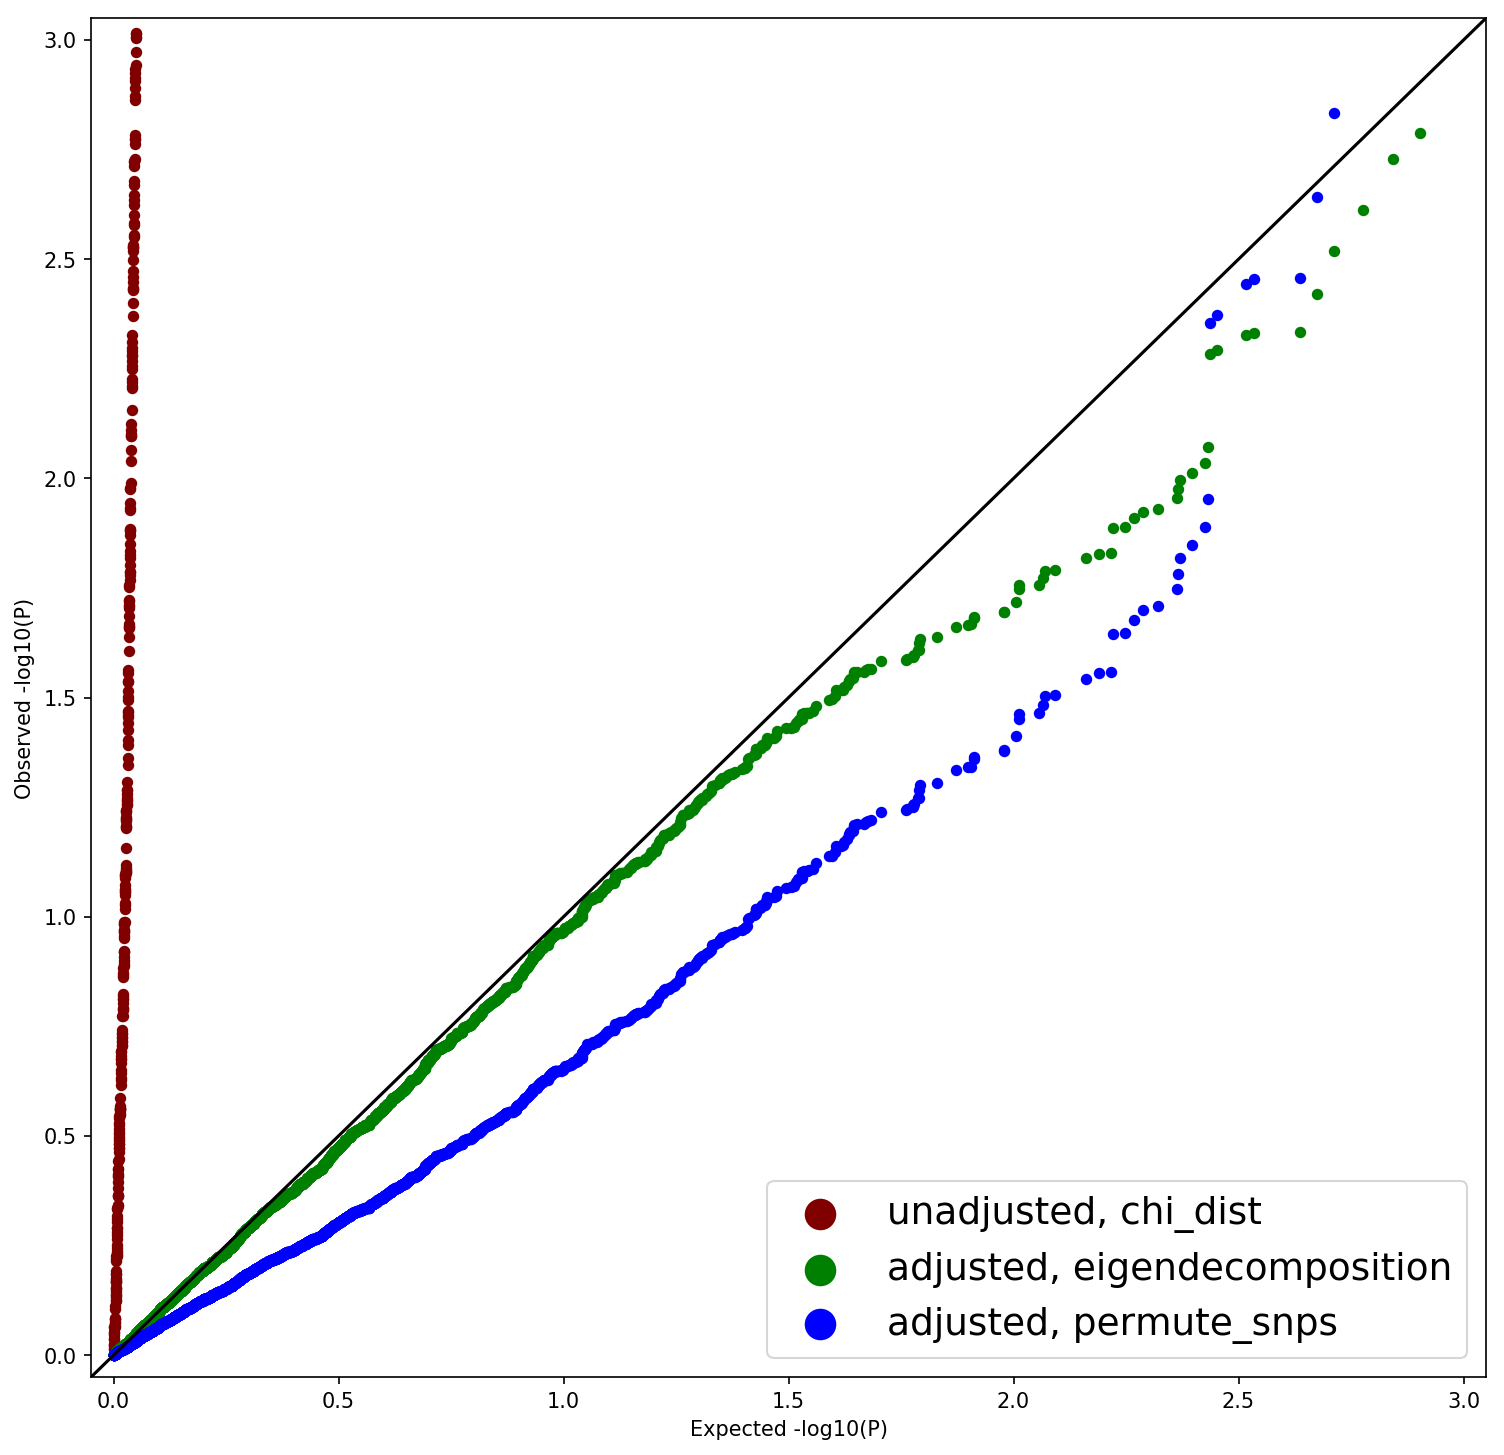

In [71]:
QQPlot(np.array(chi_dist['pvalue']), np.array(eigendecomp['pvalue']), np.array(snp_permute['pvalue']))